# Processing data

In [144]:
import pandas as pd
import seaborn as sns
import numpy as np 
from sklearn.preprocessing import OneHotEncoder 
from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import chi2, SelectKBest

In [145]:
url = r"..\data\raw\properties.csv"
house = pd.read_csv(url, sep=",")

## subsetting columns and rows

In [146]:
house.head()

,id,price,property_type,subproperty_type,region,province,locality,zip_code,latitude,longitude,...,fl_garden,garden_sqm,fl_swimming_pool,fl_floodzone,state_building,primary_energy_consumption_sqm,epc,heating_type,fl_double_glazing,cadastral_income
0,34221000,225000.0,APARTMENT,APARTMENT,Flanders,Antwerp,Antwerp,2050,51.217172,4.379982,...,0,0.0,0,0,MISSING,231.0,C,GAS,1,922.0
1,2104000,449000.0,HOUSE,HOUSE,Flanders,East Flanders,Gent,9185,51.174944,3.845248,...,0,0.0,0,0,MISSING,221.0,C,MISSING,1,406.0
2,34036000,335000.0,APARTMENT,APARTMENT,Brussels-Capital,Brussels,Brussels,1070,50.842043,4.334543,...,0,0.0,0,1,AS_NEW,NaN,MISSING,GAS,0,NaN
3,58496000,501000.0,HOUSE,HOUSE,Flanders,Antwerp,Turnhout,2275,51.238312,4.817192,...,0,0.0,0,1,MISSING,99.0,A,MISSING,0,NaN
4,48727000,982700.0,APARTMENT,DUPLEX,Wallonia,Walloon Brabant,Nivelles,1410,NaN,NaN,...,1,142.0,0,0,AS_NEW,19.0,A+,GAS,0,NaN


In [147]:
def replace_outliers(df, columns):
    for column in columns:
    # Outliers handling
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1

        max_value = Q3 + (1.5 * IQR)
        min_value = Q1 - (1.5 * IQR)

        outliers_mask = (df[column] < min_value) | (df[column] > max_value)
        df.loc[outliers_mask, column] = np.nan

        df.dropna(subset=[column], inplace=True)
    return df

In [148]:
house = house[house["property_type"] == "HOUSE"]


In [149]:
house.columns

Index(['id', 'price', 'property_type', 'subproperty_type', 'region',
       'province', 'locality', 'zip_code', 'latitude', 'longitude',
       'construction_year', 'total_area_sqm', 'surface_land_sqm',
       'nbr_frontages', 'nbr_bedrooms', 'equipped_kitchen', 'fl_furnished',
       'fl_open_fire', 'fl_terrace', 'terrace_sqm', 'fl_garden', 'garden_sqm',
       'fl_swimming_pool', 'fl_floodzone', 'state_building',
       'primary_energy_consumption_sqm', 'epc', 'heating_type',
       'fl_double_glazing', 'cadastral_income'],
      dtype='object')

In [150]:
lcolm = ["price"]
house = replace_outliers(house,lcolm)

## drop columns

In [151]:
def drop_columns(df, clist):
    ndf = df.drop(columns=clist)
    return ndf


In [152]:
todropcolumns = ['id', 'property_type', 'region', 'locality', 'zip_code', 'latitude', 'longitude',
'construction_year',
'nbr_frontages', 'equipped_kitchen', 'fl_furnished',
'fl_open_fire', 'fl_terrace', 'fl_garden',
'fl_swimming_pool', 'fl_floodzone',
'primary_energy_consumption_sqm', 'heating_type',
'fl_double_glazing', 'cadastral_income']
nhouse = drop_columns(house, todropcolumns)

In [153]:

# dropping the NaN values in the columns selected
def droping_null(df, colist):
    df.dropna(subset=colist, inplace=True)
    return df



## transform categorical data to numerical data

In [154]:
def transform_categorical2(df, clist):
    for column in clist:
        # One-hot encode the current column
        ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
        X_ohe = ohe.fit_transform(df[[column]])
        
        # Convert the one-hot encoded features to a DataFrame
        ohe_df = pd.DataFrame(X_ohe, columns=ohe.get_feature_names_out())
        
        # Concatenate the original DataFrame with the one-hot encoded DataFrame
        df = pd.concat([df, ohe_df], axis=1)
        
        # Drop the original categorical column
        df.drop(columns=[column], inplace=True)

    return df

In [155]:
def tranform_label_encoder(df, clist):
    for column in clist:
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column])
    return df



In [156]:
def select_best(df, clistColumns, predict, k):
    sk = SelectKBest(chi2, k=k)
    sk.fit(df[clistColumns], df[predict])
    selected_columns = df.columns[sk.get_support()]
    return df[selected_columns]

    

In [100]:
nhouse.head()

,price,subproperty_type,province,total_area_sqm,surface_land_sqm,nbr_bedrooms,terrace_sqm,garden_sqm,state_building,epc
1,449000.0,HOUSE,East Flanders,NaN,680.0,2.0,0.0,0.0,MISSING,C
3,501000.0,HOUSE,Antwerp,187.0,505.0,3.0,0.0,0.0,MISSING,A
5,548514.0,HOUSE,Flemish Brabant,187.0,710.0,3.0,0.0,0.0,AS_NEW,MISSING
7,424000.0,HOUSE,East Flanders,155.0,291.0,4.0,0.0,0.0,GOOD,MISSING
10,385000.0,HOUSE,East Flanders,309.0,309.0,3.0,0.0,0.0,MISSING,MISSING


In [157]:
clist = ["subproperty_type"]
plist = ["province"]
chouse = transform_categorical2(nhouse, plist)
chouse = tranform_label_encoder(chouse, clist)
#chouse = droping_null(chouse, "terrace")
#chouse = droping_null(chouse, "garden")

## Make the training set and test set

In [158]:
def create_X_y(df, Y):
    X = df.drop(columns=[Y])
    y = df[[Y]]
    return X, y




In [159]:
X, y = create_X_y(chouse, "price")

In [160]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=0 )

## Imputation on the X_train, X_test

In [161]:
X_test.shape
X_train.shape 

(44230, 19)

In [162]:
len(y_train),  len(X_train)

(44230, 44230)

In [163]:
X_train.head(350)

,subproperty_type,total_area_sqm,surface_land_sqm,nbr_bedrooms,terrace_sqm,garden_sqm,state_building,epc,province_Antwerp,province_Brussels,province_East Flanders,province_Flemish Brabant,province_Hainaut,province_Limburg,province_Liège,province_Luxembourg,province_Namur,province_Walloon Brabant,province_West Flanders
56032,7,56.0,790.0,2.0,26.0,686.0,GOOD,D,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22539,9,381.0,231.0,4.0,0.0,0.0,MISSING,F,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
17182,14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3159,14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
15056,14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27198,14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
33717,14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
54197,7,139.0,80.0,4.0,NaN,0.0,AS_NEW,D,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10579,7,173.0,768.0,2.0,0.0,0.0,TO_RENOVATE,F,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [107]:
#X_train = droping_null(chouse, "province_Antwerp")

In [164]:
def replace_NaN_Categorical(df, comlist):
    df[comlist] = df[comlist].fillna(0.0)
    

In [165]:
X_train = drop_columns(X_train, ["price"])
X_test = drop_columns(X_test, ["price"])

KeyError: "['price'] not found in axis"

In [166]:
def change_to_int(df, columnsname):
    for column in columnsname:
        df[column] = df[column].round().astype(int)
    return df


In [167]:
def replace_null_median(df, columnname):
    for column in columnname:
        condition_1 = (df[column].isnull())
        df.loc[condition_1, column] = df[column].median()
    return df

In [168]:
def replace_missing_mode(df, columnname):
    for column in columnname:
        condition_1 = (df[column].isnull()) | (df[column] == "MISSING") | (df[column].isna())
        mode_val = df[df[column] != "MISSING"][column].mode()[0]  # Mode value excluding "MISSING"
        if pd.isna(mode_val):  # Check if mode value is NaN
            mode_val = df[df[column] != "MISSING"][column].mode().dropna().iloc[0]  # Get the first non-NaN mode value
        df.loc[condition_1, column] = mode_val
    return df


In [169]:
def replace_null_mean(df, columnname):

    for column in columnname:
        condition_1 = (df[column].isnull())
        df.loc[condition_1, column] = df[column].mean()
    return df

In [170]:
def replace_null_to_zero(df, columnname):

    for column in columnname:
        condition_1 = (df[column].isnull())
        df.loc[condition_1, column] = 0.0
    return df

### replacing values

In [171]:
X_train = replace_null_mean(X_train, ["total_area_sqm", "surface_land_sqm", "terrace_sqm", "garden_sqm"])
X_train = replace_null_median(X_train, ["nbr_bedrooms"])
X_train = replace_missing_mode(X_train, ["state_building", "epc"])

X_test = replace_null_mean(X_test, ["total_area_sqm", "surface_land_sqm", "terrace_sqm", "garden_sqm"])
X_test = replace_null_median(X_test, ["nbr_bedrooms"])
X_test = replace_missing_mode(X_test, ["state_building", "epc"])

In [172]:
X_train = tranform_label_encoder(X_train, ["state_building", "epc"])
X_test = tranform_label_encoder(X_test, ["state_building", "epc"])

In [116]:
#X_train = change_to_int(X_train, ["fully_equipped_kitchen", "number_of_facades", "swimming_pool"])
#X_test = change_to_int(X_test, ["fully_equipped_kitchen", "number_of_facades", "swimming_pool"])

In [173]:
y_test = replace_null_mean(y_test, ["price"])
y_train = replace_null_mean(y_train, ["price"])

In [175]:
columns_with_null = X_train.columns[X_train.isnull().any()].tolist()
X_train = replace_null_to_zero(X_train, columns_with_null)
X_test = replace_null_to_zero(X_test, columns_with_null)

In [176]:
X_train.head()

,subproperty_type,total_area_sqm,surface_land_sqm,nbr_bedrooms,terrace_sqm,garden_sqm,state_building,epc,province_Antwerp,province_Brussels,province_East Flanders,province_Flemish Brabant,province_Hainaut,province_Limburg,province_Liège,province_Luxembourg,province_Namur,province_Walloon Brabant,province_West Flanders
56032,7,56.000000,790.000000,2.0,26.000000,686.000000,1,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22539,9,381.000000,231.000000,4.0,0.000000,0.000000,1,7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
17182,14,195.872759,759.667363,3.0,9.942961,154.132072,1,7,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3159,14,195.872759,759.667363,3.0,9.942961,154.132072,1,7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
15056,14,195.872759,759.667363,3.0,9.942961,154.132072,1,7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


### scaling values

In [177]:
def scaling(df, cl):
    for column in cl:
        scaler = StandardScaler()
        #Fit and transform the data
        df[column] = scaler.fit_transform(df[[column]])
    return df

In [121]:
#numerical_columns = ['living_area', 'terrace_area', 'garden_area', 'surface_of_good']
#X_test = scaling(X_test, numerical_columns)
#X_train = scaling(X_train, numerical_columns)

### testing the model

In [178]:
X_train.isnull().sum(), len(X_train)

(subproperty_type            0
 total_area_sqm              0
 surface_land_sqm            0
 nbr_bedrooms                0
 terrace_sqm                 0
 garden_sqm                  0
 state_building              0
 epc                         0
 province_Antwerp            0
 province_Brussels           0
 province_East Flanders      0
 province_Flemish Brabant    0
 province_Hainaut            0
 province_Limburg            0
 province_Liège              0
 province_Luxembourg         0
 province_Namur              0
 province_Walloon Brabant    0
 province_West Flanders      0
 dtype: int64,
 44230)

In [179]:
y_test.isnull().sum()

price    0
dtype: int64

In [180]:
len(y_train),  len(X_train)

(44230, 44230)

In [181]:
X_train.head()

,subproperty_type,total_area_sqm,surface_land_sqm,nbr_bedrooms,terrace_sqm,garden_sqm,state_building,epc,province_Antwerp,province_Brussels,province_East Flanders,province_Flemish Brabant,province_Hainaut,province_Limburg,province_Liège,province_Luxembourg,province_Namur,province_Walloon Brabant,province_West Flanders
56032,7,56.000000,790.000000,2.0,26.000000,686.000000,1,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22539,9,381.000000,231.000000,4.0,0.000000,0.000000,1,7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
17182,14,195.872759,759.667363,3.0,9.942961,154.132072,1,7,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3159,14,195.872759,759.667363,3.0,9.942961,154.132072,1,7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
15056,14,195.872759,759.667363,3.0,9.942961,154.132072,1,7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [182]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [183]:
regressor.fit(X_train, y_train).predict(X_test)


array([[382246.73978539],
       [419071.23292324],
       [410383.84518541],
       ...,
       [378377.52008566],
       [382322.28251481],
       [360555.0516895 ]])

In [184]:
regressor.score(X_train, y_train)

0.2183181419292739

In [185]:
y_pred = regressor.predict(X_test)
score = r2_score(y_test, y_pred)
score

0.1719992515089913

## Plotting the result

KeyError: 'living_area'

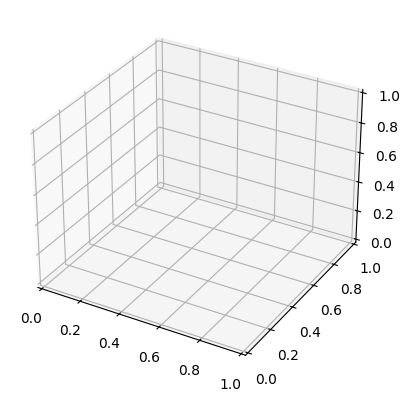

In [186]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(y_train['price'], X_train['living_area'], X_train['property_subtype'])